# Data Science Playground (in Python)

**NOTE: this is an early work in progress. Check back shortly for new additions.**
 

## Introduction 

As I work through the Python DataCamp, this notebook will become my go-to location for writing up disparate snippets of code that I find useful and interesting but don't yet have a permanent home for in one of [my other data-science-tool-specific folders]('https://github.com/pmaji/data-science-toolkit'), but once I have finished the coursework and have had time to give the organization of this document more thought, many sections contained herein will likely be expanded on and included in other sections of this repository. Given the nature of this document, this code will likely not be as well-commented or generally understandable as that contained in my other vignettes, but this document is mostly my scratchpaper, so that is to be expected. 

In [1]:
# everyone's gotta have a hello world right? I'll delete this shortly but for now it stays.
print("Hello world. My name is Paul and this is my test space for EDA in python.")

Hello world. My name is Paul and this is my test space for EDA in python.


### Setup 

To enable toggle-able table of contents (with button to enable / disable), check out [this link here]('https://github.com/minrk/ipython_extensions') for instructions on how to get set up. 

In [2]:
# key libraries
import pandas as pd

In [3]:
# cd to correct directory 
%cd '/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit' 
# print working directory just be sure
%pwd  

/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit


'/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit'

## Random Walk Simulation

The problem being explored below is essentially a random walk problem. We are attempting to figure out the probability that we would end up passing a certain floor while playing a dice game in a large building. This dice game has a couple of rules that are seen in the code below, which include:

- If you role a 1 or a 2 you go down a level.
- If you role a 3-5 you go up a level.
- If you role a 6 you role again and go up the # of levels rolled.
- You can't go below step 0. 
- There's a 0.1% chance you fall all the way down the stairs each time you roll.
- Bet to get the odds of is that you'll be at or above step 60 after 100 throws. 

In [4]:
# preparatory work 
# importing necessary packages for this excercise
import matplotlib.pyplot as plt
import numpy as np
# setting the seed
np.random.seed(123)

In [5]:
# start by initializing an empty list to hold the running results
# each time we complete one simulation of 100 throws, we add an observation to all_walks
all_walks = []

# building the iterator 
# we're going to run this 150 times
for i in range(150) :
    # initialize the random walk list starting at step (aka floor) 0
    random_walk = [0]
    # build iteratory to simulate 100 dice-throws
    for x in range(100) :
        # looks at the most recent entry in random_walk to get current step
        step = random_walk[-1]
        # gets the result of simulated die-roll for this iteration
        # can take any integer value from 1-6
        dice = np.random.randint(1,7)
        # control logic based on result of die-roll to get step result
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        # Implement clumsiness
        if np.random.rand(0,1) <= 0.001 :
            step = 0
            
        # appends the step result from die roll to random_walk list
        random_walk.append(step)
    # after 100 iterations, appends the walk results to all_walks
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)
# takes a look at the resulting array (like head for np arrays)
np_aw.view()

array([[ 0,  3,  4, ..., 58, 59, 60],
       [ 0,  4,  3, ..., 70, 71, 73],
       [ 0,  2,  1, ..., 85, 84, 83],
       ..., 
       [ 0,  1,  2, ..., 79, 80, 79],
       [ 0,  1,  2, ..., 92, 93, 94],
       [ 0,  0,  0, ..., 67, 68, 69]])

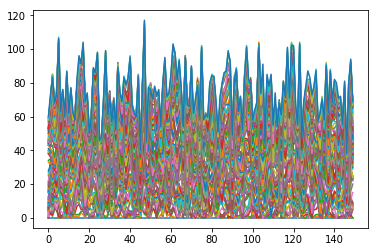

In [6]:
# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

In [7]:
# Transpose np_aw: np_aw_t
# Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.
np_aw_t = np.transpose(np_aw)
np_aw_t.view()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  4,  2, ...,  1,  1,  0],
       [ 4,  3,  1, ...,  2,  2,  0],
       ..., 
       [58, 70, 85, ..., 79, 92, 67],
       [59, 71, 84, ..., 80, 93, 68],
       [60, 73, 83, ..., 79, 94, 69]])

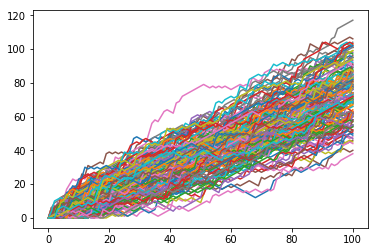

In [8]:
# this post-transpose view of the random walks is thus much easier to interpret
# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

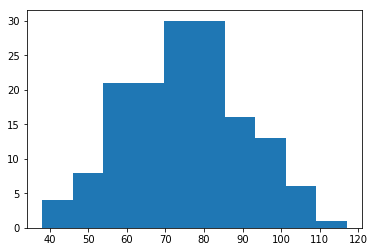

In [9]:
# Now that we have visualized the random walk, we need to see the distros of where they ended
# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [10]:
# finally, to answer the question of the prompt
# what are the odds that I end up at or above 60?
# we can start by looking at the result of all of our ends
print(ends >= 60)
# and then we take the mean which, given 1 = True and False = 0, returns the percent True
np.mean(ends >= 60)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True False False  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
 False  True False  True  True  True]


0.83999999999999997